In [25]:
import os.path
import pandas

In [26]:
file_path = input("Enter the path of .xlsx excel file : ")
data = pandas.read_excel(file_path,skiprows=19,skipfooter=2)

In [27]:
data['year_month'] = data['Value Date'].dt.to_period("M")
data['year_month_1'] = data['Value Date'].dt.month_name(locale = 'English') 
try:
    data['Debit'] = data['        Debit']
except KeyError as e:
    print(e)

In [28]:
data_gb = data.groupby('year_month')

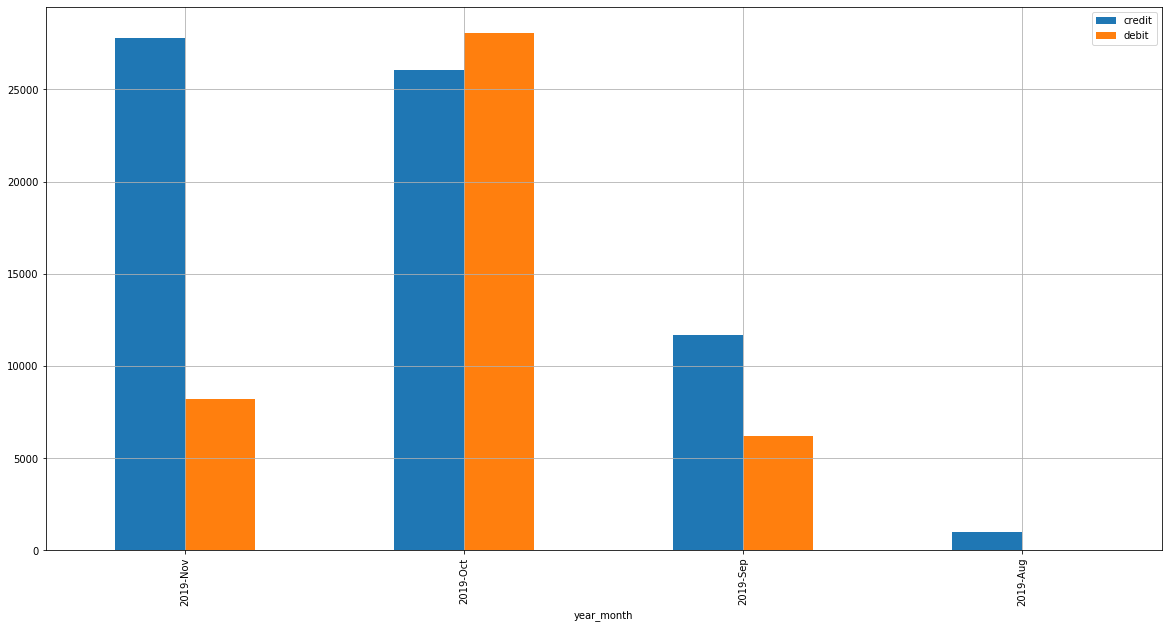

In [29]:
credit,debit,year_month = [],[],[]
for key,df in data_gb:
    credit.append(sum(df['Credit'].apply(lambda x: 0 if (x == ' ') else x).tolist()))
    debit.append(sum(df['Debit'].apply(lambda x: 0 if (x == ' ') else x).tolist()))
    year_month.append(key)
summary = pandas.DataFrame({'year_month':year_month,'credit':credit,'debit':debit})
summary.year_month = summary['year_month'].apply(pandas.Period.to_timestamp)
summary = summary.sort_values('year_month',ascending = False)
summary['month_name'] = summary['year_month'].apply(lambda x : x.strftime("%Y-%b"))
ax = summary.plot(kind = 'bar',figsize=(20,10),x = 'year_month',grid = True)
ax.set_xticklabels(summary['month_name'])
figure = ax.get_figure()
figure.savefig(os.path.abspath(os.path.join(file_path, os.pardir))+'\\chart.pdf')